In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
# import the data set into a data frame
train = pd.read_csv('Data//train.csv')

In [79]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


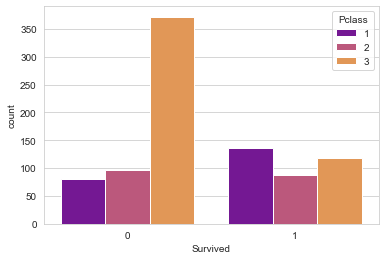

In [81]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, hue='Pclass', palette='plasma')

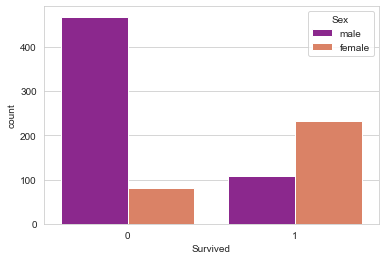

In [6]:
sns.countplot(x='Survived', data=train, hue='Sex', palette='plasma')

In [7]:
#sns.pairplot(data=df[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']])

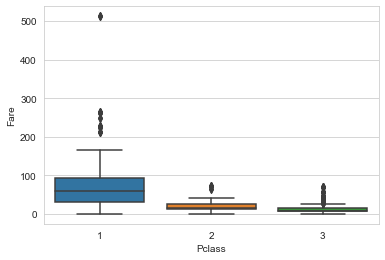

In [8]:
sns.boxplot(x='Pclass', y='Fare', data=train)

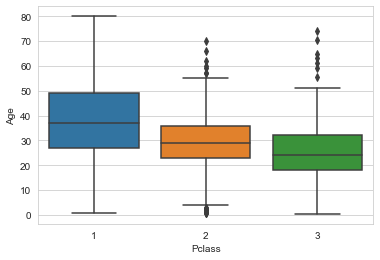

In [9]:
sns.boxplot(x='Pclass', y='Age', data=train)

In [10]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


Text(0.5, 1.0, 'People survived, by sex')

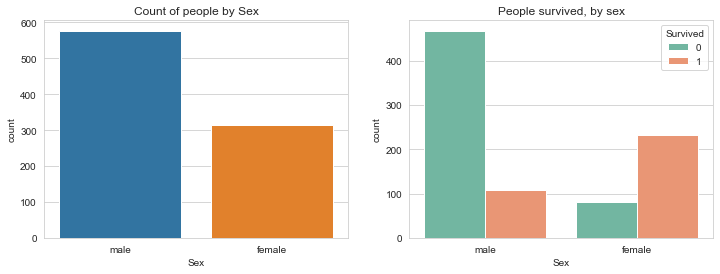

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

sns.countplot(x='Sex', data=train, ax=axes[0])
axes[0].set_title('Count of people by Sex')

sns.countplot(x='Sex', data=train, ax=axes[1], hue='Survived', palette='Set2')
axes[1].set_title('People survived, by sex')

Text(0.5, 1.0, 'Number of people survived by Pclass')

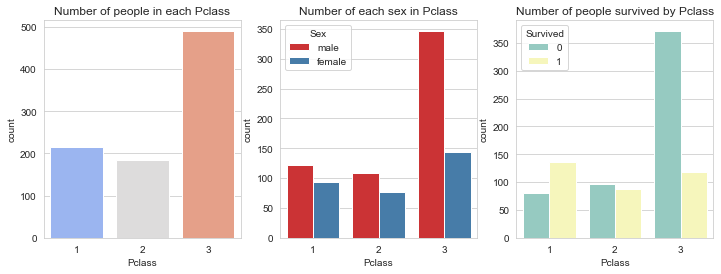

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

sns.countplot(x='Pclass', data=train, ax=axes[0], palette='coolwarm')
axes[0].set_title('Number of people in each Pclass')

sns.countplot(x='Pclass', data=train, hue='Sex', ax=axes[1], palette='Set1')
axes[1].set_title('Number of each sex in Pclass')

sns.countplot(x='Pclass', data=train, hue='Survived', ax=axes[2], palette='Set3')
axes[2].set_title('Number of people survived by Pclass')

Text(0.5, 1.0, 'Number of people survived by Embark location')

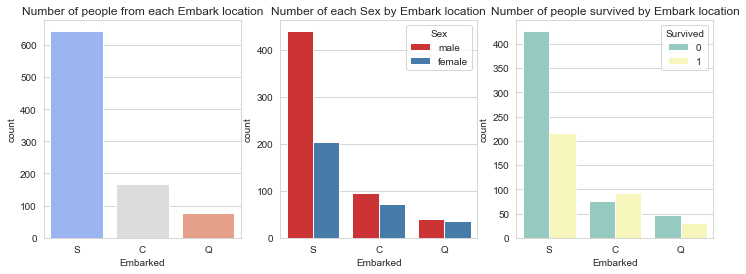

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

sns.countplot(x='Embarked', data=train, ax=axes[0], palette='coolwarm')
axes[0].set_title('Number of people from each Embark location')

sns.countplot(x='Embarked', data=train, hue='Sex', ax=axes[1], palette='Set1')
axes[1].set_title('Number of each Sex by Embark location')

sns.countplot(x='Embarked', data=train, hue='Survived', ax=axes[2], palette='Set3')
axes[2].set_title('Number of people survived by Embark location')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


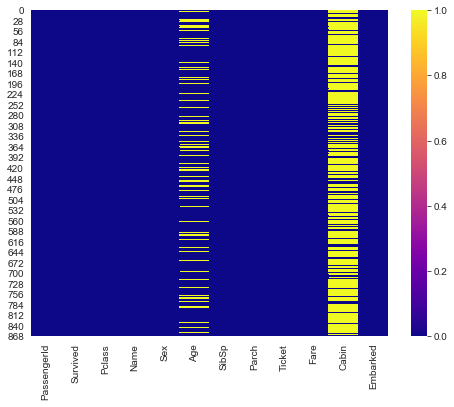

In [14]:
print(train.isnull().sum())

plt.figure(figsize=(8,6))
sns.heatmap(data=train.isnull(), cmap='plasma')

In [15]:
# Check for missing data by value and percent of data
def missing_vals(data, label):
    print(f'{label} - Missing Values:')
    print('------------------------------')
    for col in data.columns:
        vals = data[col].isnull().sum()
        if vals > 0:           
            pct = round(100 * vals / len(data), 2)
            print(f'{col} = {vals} | {pct}%')

In [16]:
missing_vals(train, 'Train DF')

Train DF - Missing Values:
------------------------------
Age = 177 | 19.87%
Cabin = 687 | 77.1%
Embarked = 2 | 0.22%


In [17]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


### Summary of initial glance over data:

**PassengerId** - Identification number of each passenger | **delete**

**Survived** - Survived = 1, did not survive = 0 | **ready**

**Pclass** - The social class of each passenger | **encode to categorical**

**Name** - Name of each passenger | **might be able to do something with title**

**Sex** - Sex of passenger | **encode to categorical**

**Age** - Age of passenger | **ready**

**SibSp** - # of siblings/spouses on board | **ready (potential combine with Parch)**

**Parch** - # of parents/children on board | **ready (potential combine with SibSp)**

**Ticket** - Ticket number for each passenger | **might be able to do something with leading mark**

**Fare** - Ticket price for passenger | **ready**

**Cabin** - Cabin number | **delete**

**Embarked** - Location passenger embarked from | **encode to categorical**

In [18]:
train.drop(['Cabin', 'PassengerId'], axis=1, inplace=True)

In [19]:
# Clean data startinng with Age
train.corr()['Age'].sort_values()[:-1]

Pclass     -0.369226
SibSp      -0.308247
Parch      -0.189119
Survived   -0.077221
Fare        0.096067
Name: Age, dtype: float64

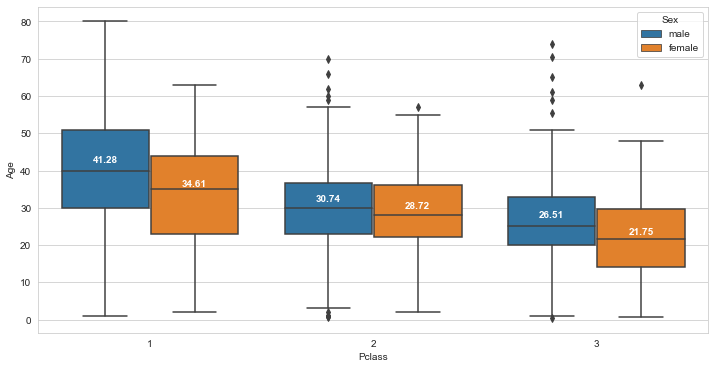

In [20]:
plt.figure(figsize=(12,6))

AvgAgePlot = sns.boxplot(x='Pclass', y='Age', hue='Sex', data=train)

m1 = train.groupby(['Pclass', 'Sex'])['Age'].mean().values
mL1 = [str(np.round(s, 2)) for s in m1]

ind = 0
for tick in range(len(AvgAgePlot.get_xticklabels())):
    AvgAgePlot.text(tick-.2, m1[ind+1]+1, mL1[ind+1], horizontalalignment='center', color='white', weight='semibold')
    AvgAgePlot.text(tick+.2, m1[ind]+1, mL1[ind], horizontalalignment='center', color='white', weight='semibold')
    ind += 2

In [21]:
age_chart = train.groupby(['Pclass','Sex']).mean()['Age']
age_chart

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [22]:
age_chart.xs([1, 'female'])

34.61176470588235

In [23]:
def fill_age(Pclass, Sex, Age):
    if pd.isnull(Age):
        return age_chart.xs([Pclass, Sex])
    else:
        return Age

In [24]:
# Fill the null Age values with the average age of the person with specific Sex and Pclass
train['Age'] = train.apply(lambda x: fill_age(x['Pclass'], x['Sex'], x['Age']), axis=1)

In [25]:
# We will just drop the 2 entries with unknown Embarked locations
train = train.dropna()

In [26]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [27]:
train.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [28]:
# splitting up the title for each person
train['Name'][405].split('.')[0].split()[-1]

'Mr'

In [29]:
def title_in_name(Name):
    if '.' in Name:
        return Name.split('.')[0].split()[-1]    

In [30]:
train['title'] = train['Name'].apply(title_in_name)

In [31]:
train.drop('Name', axis=1, inplace=True)

In [32]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,0,3,male,35.0,0,0,373450,8.0500,S,Mr


In [33]:
train['title'].value_counts()

Mr          517
Miss        181
Mrs         124
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Capt          1
Countess      1
Lady          1
Sir           1
Mme           1
Don           1
Ms            1
Jonkheer      1
Name: title, dtype: int64

In [34]:
other_list = []

for i, num in enumerate(train['title'].value_counts()):
    if num < 3:
        other_list.append(train['title'].value_counts().index[i])

In [35]:
other_list

['Col',
 'Major',
 'Mlle',
 'Capt',
 'Countess',
 'Lady',
 'Sir',
 'Mme',
 'Don',
 'Ms',
 'Jonkheer']

In [36]:
train['title'] = train['title'].replace(other_list, 'other')

In [37]:
train['title'].value_counts()

Mr        517
Miss      181
Mrs       124
Master     40
other      14
Dr          7
Rev         6
Name: title, dtype: int64

In [38]:
# now that the titles are classified into smaller groups, we will categorize them into features
title_dummies = pd.get_dummies(train['title'], prefix='title', drop_first=True)
train = pd.concat([train, title_dummies], axis=1)
train.drop('title', axis=1, inplace=True)

In [39]:
train.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title_Master,title_Miss,title_Mr,title_Mrs,title_Rev,title_other
0,0,3,male,22.0,1,0,A/5 21171,7.25,S,0,0,1,0,0,0


In [40]:
print('Number of unique variables for Pclass: ', train['Pclass'].nunique())
print('Number of unique variables for Sex: ', train['Sex'].nunique())
print('Number of unique variables for Embarked: ', train['Embarked'].nunique())

Number of unique variables for Pclass:  3
Number of unique variables for Sex:  2
Number of unique variables for Embarked:  3


In [41]:
# now lets make the Pclass, Sex, and Embarked columns categorical
Pclass_dummies = pd.get_dummies(train['Pclass'], prefix='Pclass', drop_first=True)
Sex_dummies = pd.get_dummies(train['Sex'], prefix='Sex', drop_first=True)
Embarked_dummies = pd.get_dummies(train['Embarked'], prefix='Embarked', drop_first=True)



train = pd.concat([train, Pclass_dummies, Sex_dummies, Embarked_dummies], axis=1)
train.drop(['Sex','Embarked', 'Pclass'], axis=1, inplace=True)

In [42]:
train.head(1)

,Survived,Age,SibSp,Parch,Ticket,Fare,title_Master,title_Miss,title_Mr,title_Mrs,title_Rev,title_other,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,A/5 21171,7.25,0,0,1,0,0,0,0,1,1,0,1


In [43]:
tick_abrev = []
oth_feats = []

for i,tick in enumerate(train['Ticket']):
    if len(tick.split()) < 2:
        pass
    else:
        tick_abrev.append(tick.split()[0])
        oth_feats.append((train['Survived'][i], train['Sex_male'][i]))

In [44]:
# Look at the percentage of people who survived that had a ticket abreviation
tick_surv = round(100 * pd.DataFrame(oth_feats, columns=['Survived', 'Sex_male'])['Survived'].sum()/len(tick_abrev), 2)
print(f'Percent of people who survived with a ticket abv: {tick_surv} %')

Percent of people who survived with a ticket abv: 37.17 %


In [45]:
train_surv = round(100*train['Survived'].sum()/len(train), 2)
print(f'Percent of people who survived in training set: {train_surv} %')

Percent of people who survived in training set: 38.25 %


**Since the percent of people who survived with a ticket abv vs the whole training set is roughly the same, we can infer that there is no strong correlation between survival and having a ticket abreviation.**

We will drop the Ticket feature now.

In [46]:
train.drop('Ticket', axis=1, inplace=True)

In [47]:
train.head(1)

,Survived,Age,SibSp,Parch,Fare,title_Master,title_Miss,title_Mr,title_Mrs,title_Rev,title_other,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.25,0,0,1,0,0,0,0,1,1,0,1


### Parch and SibSp feature analysis

The last few features that are of interst would be Parch and SibSp. Lets see if there is a strong correlation with survival for people that have family on board vs being alone.

In [48]:
# Lets create a feature for identifying if people are alone
def lonely(Parch, SibSp):
    if Parch == 0 and SibSp == 0:
        return 1
    else:
        return 0

In [49]:
train['Alone'] = train.apply(lambda x: lonely(x['Parch'], x['SibSp']), axis=1)

In [50]:
train.head(1)

,Survived,Age,SibSp,Parch,Fare,title_Master,title_Miss,title_Mr,title_Mrs,title_Rev,title_other,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Alone
0,0,22.0,1,0,7.25,0,0,1,0,0,0,0,1,1,0,1,0


### Now we need to train the model

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

**Import the models that we want to try for our GridSearch**

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

**Import modules for cross validation of our models**

In [55]:
# we will use KFold cross_validation method first, then we might try 'hold-out'
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_score, KFold

In [56]:
# Cross validate the model
kfold = StratifiedKFold(n_splits=10)

In [61]:
rs = 2
LogReg = LogisticRegression(random_state=rs)
svc = SVC(random_state=rs)
lin_svc = LinearSVC(random_state=rs)
AdaBoostC_DTC = AdaBoostClassifier(DecisionTreeClassifier(random_state=rs), random_state=rs)
AdaBoostC_RFC = AdaBoostClassifier(RandomForestClassifier(n_estimators=100, random_state=rs))
RFC = RandomForestClassifier(n_estimators=100, random_state=rs)

In [62]:
# Grouping our classifiers into a list for easy assessment
classifiers = []
classifiers.append(LogReg)
classifiers.append(svc)
classifiers.append(lin_svc)
classifiers.append(RFC)
classifiers.append(AdaBoostC_RFC)
classifiers.append(AdaBoostC_DTC)

In [63]:
# run each model initially, and compare the cross-validation scores
import time
cv_results = []
time_tbl = []

for cls in classifiers:
    start = time.time()
    cv_results.append(cross_val_score(cls, X=X_train, y=y_train, cv=kfold, n_jobs=-1, scoring='accuracy'))
    end = time.time()
    time_tbl.append(end-start)

cv_mean = []
cv_std = []

for res in cv_results:
    cv_mean.append(np.mean(res))
    cv_std.append(np.std(res))

cv_result = pd.DataFrame(data={'Mean CV Scores':cv_mean, 'Std of CV Scores':cv_std, 'Efficiency in Time':time_tbl}, 
                         index=['LogReg', 'SVC', 'Lin_SVC', 'RFC', 'AdaBC w/ RFC','AdaBC w/ DTC'],)

In [64]:
cv_result_sort = cv_result.sort_values(by='Mean CV Scores', ascending=False)
cv_result_sort

,Mean CV Scores,Std of CV Scores,Efficiency in Time
LogReg,0.832714,0.050226,0.027903
RFC,0.805290,0.042884,0.135637
AdaBC w/ RFC,0.792516,0.043217,6.081739
AdaBC w/ DTC,0.776516,0.046577,0.113695
Lin_SVC,0.773651,0.064313,0.054852
SVC,0.738008,0.036230,0.035903


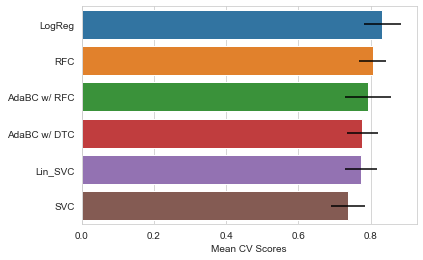

In [65]:
sns.barplot(x='Mean CV Scores', y=cv_result_sort.index, data=cv_result_sort, **{'xerr':cv_std})

### SVC hyperparameter tuning
**Gamma** - value correlates to how the model is trying to fit to the data - the higher the gamma, the more fitting. Gamma value is only for non-linear kernels (rbf, poly, sigmoid) - values of roughly 10 and lower... maybe 100

**C** - is the penalty parameter of the error term, difference between smooth boundary and classifying points. The higher the C value, the more overfitting that will occur - values of 0.1 - 1000 ?

**degree** - is only used for 'poly' kernels, sets the degrees of freedom for the parameters

### Time to set parameter grids for each model that we want to test
We will testing every model except for the AdaBoost with RFC model. Even though it had a comparable score to the LogisticRegression model, it is an extremely inefficient model in comparison.
    

In [66]:
from sklearn.model_selection import GridSearchCV

### SVC

In [67]:
# Set the parameter girds and search for the SVC model
svc_param_grid = {'C':[0.1, 1, 10, 100, 1000, 10000], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001], 'kernel':['rbf', 'sigmoid']}
svc_grid = GridSearchCV(SVC(random_state=rs), param_grid=svc_param_grid, verbose=3)
svc_grid.fit(X_train, y_train)

C:\Users\samdo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 84 candidates, totalling 252 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.611, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.609, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.609, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.611, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.609, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.609, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[CV] ... C=1, gamma=0.0001, kernel=sigmoid, score=0.628, total=   0.0s
[CV] C=1, gamma=1e-05, kernel=rbf ....................................
[CV] ........ C=1, gamma=1e-05, kernel=rbf, score=0.678, total=   0.0s
[CV] C=1, gamma=1e-05, kernel=rbf ....................................
[CV] ........ C=1, gamma=1e-05, kernel=rbf, score=0.652, total=   0.0s
[CV] C=1, gamma=1e-05, kernel=rbf ....................................
[CV] ........ C=1, gamma=1e-05, kernel=rbf, score=0.638, total=   0.0s
[CV] C=1, gamma=1e-05, kernel=sigmoid ................................
[CV] .... C=1, gamma=1e-05, kernel=sigmoid, score=0.649, total=   0.0s
[CV] C=1, gamma=1e-05, kernel=sigmoid ................................
[CV] .... C=1, gamma=1e-05, kernel=sigmoid, score=0.628, total=   0.0s
[CV] C=1, gamma=1e-05, kernel=sigmoid ................................
[CV] .... C=1, gamma=1e-05, kernel=sigmoid, score=0.623, total=   0.0s
[CV] C=1, gamma=1e-06, kernel=rbf ....................................
[CV] .

[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.749, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=100, gamma=0.01, kernel=sigmoid, score=0.490, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=100, gamma=0.01, kernel=sigmoid, score=0.464, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=100, gamma=0.01, kernel=sigmoid, score=0.469, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.803, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.773, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.821, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] .

[CV] ........ C=10000, gamma=1, kernel=rbf, score=0.614, total=   0.0s
[CV] C=10000, gamma=1, kernel=rbf ....................................
[CV] ........ C=10000, gamma=1, kernel=rbf, score=0.643, total=   0.0s
[CV] C=10000, gamma=1, kernel=sigmoid ................................
[CV] .... C=10000, gamma=1, kernel=sigmoid, score=0.611, total=   0.0s
[CV] C=10000, gamma=1, kernel=sigmoid ................................
[CV] .... C=10000, gamma=1, kernel=sigmoid, score=0.609, total=   0.0s
[CV] C=10000, gamma=1, kernel=sigmoid ................................
[CV] .... C=10000, gamma=1, kernel=sigmoid, score=0.609, total=   0.0s
[CV] C=10000, gamma=0.1, kernel=rbf ..................................
[CV] ...... C=10000, gamma=0.1, kernel=rbf, score=0.654, total=   0.0s
[CV] C=10000, gamma=0.1, kernel=rbf ..................................
[CV] ...... C=10000, gamma=0.1, kernel=rbf, score=0.652, total=   0.0s
[CV] C=10000, gamma=0.1, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 252 out of 252 | elapsed:    4.0s finished
C:\Users\samdo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=2, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06],
                         'kernel': ['rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [68]:
print(f'Best parameters: {svc_grid.best_params_}')
print(f'Best Score: {svc_grid.best_score_}')

Best parameters: {'C': 10000, 'gamma': 1e-05, 'kernel': 'rbf'}
Best Score: 0.8295819935691319


In [69]:
from sklearn.metrics import classification_report, confusion_matrix

In [70]:
svc_grid_preds = svc_grid.predict(X_test)
print(classification_report(y_test, svc_grid_preds))
print(confusion_matrix(y_test, svc_grid_preds))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       170
           1       0.78      0.67      0.72        97

    accuracy                           0.81       267
   macro avg       0.80      0.78      0.79       267
weighted avg       0.81      0.81      0.81       267

[[152  18]
 [ 32  65]]


In [71]:
cv_result.index

Index(['LogReg', 'SVC', 'Lin_SVC', 'RFC', 'AdaBC w/ RFC', 'AdaBC w/ DTC'], dtype='object')

### LOGISTIC REGRESSION

In [72]:
LR_param_grid = {'C':[0.1, 1, 10, 100, 1000, 10000], 'solver':['liblinear', 'saga'], 'penalty':['l1', 'l2']}
LR_grid = GridSearchCV(LogisticRegression(random_state=rs), param_grid=LR_param_grid, scoring='accuracy', verbose=3)
LR_grid.fit(X_train, y_train)

C:\Users\samdo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\samdo\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\samdo\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\samdo\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: Conver

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] C=0.1, penalty=l1, solver=liblinear .............................
[CV] . C=0.1, penalty=l1, solver=liblinear, score=0.798, total=   0.0s
[CV] C=0.1, penalty=l1, solver=liblinear .............................
[CV] . C=0.1, penalty=l1, solver=liblinear, score=0.729, total=   0.0s
[CV] C=0.1, penalty=l1, solver=liblinear .............................
[CV] . C=0.1, penalty=l1, solver=liblinear, score=0.816, total=   0.0s
[CV] C=0.1, penalty=l1, solver=saga ..................................
[CV] ...... C=0.1, penalty=l1, solver=saga, score=0.673, total=   0.0s
[CV] C=0.1, penalty=l1, solver=saga ..................................
[CV] ...... C=0.1, penalty=l1, solver=saga, score=0.681, total=   0.0s
[CV] C=0.1, penalty=l1, solver=saga ..................................
[CV] ...... C=0.1, penalty=l1, solver=saga, score=0.662, total=   0.0s
[CV] C=0.1, penalty=l2, solver=liblinear .............................
[CV] . C=0.1, pe

C:\Users\samdo\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\samdo\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\samdo\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\samdo\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\samdo\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

[CV] ...... C=100, penalty=l2, solver=saga, score=0.681, total=   0.0s
[CV] C=100, penalty=l2, solver=saga ..................................
[CV] ...... C=100, penalty=l2, solver=saga, score=0.657, total=   0.0s
[CV] C=1000, penalty=l1, solver=liblinear ............................
[CV]  C=1000, penalty=l1, solver=liblinear, score=0.837, total=   0.0s
[CV] C=1000, penalty=l1, solver=liblinear ............................
[CV]  C=1000, penalty=l1, solver=liblinear, score=0.778, total=   0.0s
[CV] C=1000, penalty=l1, solver=liblinear ............................
[CV]  C=1000, penalty=l1, solver=liblinear, score=0.845, total=   0.0s
[CV] C=1000, penalty=l1, solver=saga .................................
[CV] ..... C=1000, penalty=l1, solver=saga, score=0.668, total=   0.0s
[CV] C=1000, penalty=l1, solver=saga .................................
[CV] ..... C=1000, penalty=l1, solver=saga, score=0.681, total=   0.0s
[CV] C=1000, penalty=l1, solver=saga .................................
[CV] .

C:\Users\samdo\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\samdo\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\samdo\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\samdo\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\samdo\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

[CV]  C=10000, penalty=l1, solver=liblinear, score=0.778, total=   0.0s
[CV] C=10000, penalty=l1, solver=liblinear ...........................
[CV]  C=10000, penalty=l1, solver=liblinear, score=0.845, total=   0.0s
[CV] C=10000, penalty=l1, solver=saga ................................
[CV] .... C=10000, penalty=l1, solver=saga, score=0.668, total=   0.0s
[CV] C=10000, penalty=l1, solver=saga ................................
[CV] .... C=10000, penalty=l1, solver=saga, score=0.681, total=   0.0s
[CV] C=10000, penalty=l1, solver=saga ................................
[CV] .... C=10000, penalty=l1, solver=saga, score=0.657, total=   0.0s
[CV] C=10000, penalty=l2, solver=liblinear ...........................
[CV]  C=10000, penalty=l2, solver=liblinear, score=0.837, total=   0.0s
[CV] C=10000, penalty=l2, solver=liblinear ...........................
[CV]  C=10000, penalty=l2, solver=liblinear, score=0.778, total=   0.0s
[CV] C=10000, penalty=l2, solver=liblinear ...........................
[C

C:\Users\samdo\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\samdo\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\samdo\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.6s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=2, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=3)

In [73]:
print(f'Best parameters: {LR_grid.best_params_}')
print(f'Best Score: {LR_grid.best_score_}')

Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.8279742765273312


In [74]:
LR_grid_preds = LR_grid.predict(X_test)
print(classification_report(y_test, LR_grid_preds))
print(confusion_matrix(y_test, LR_grid_preds))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       170
           1       0.76      0.70      0.73        97

    accuracy                           0.81       267
   macro avg       0.80      0.79      0.79       267
weighted avg       0.81      0.81      0.81       267

[[148  22]
 [ 29  68]]


### ADABOOSTING WITH DECISION TREE CLASSIFIER

In [75]:
# to pass parameters to the DTC within the ABC, use 'base_estimator__"DTC parameter"'
AdaBC_DTC = AdaBoostClassifier(DecisionTreeClassifier(random_state=rs),random_state=rs)

adaBC_DTC_param_grid = {'base_estimator__criterion':['gini','entropy'], 'base_estimator__splitter':['best','random'],
                        'algorithm':['SAMME','SAMME.R'],
                        'n_estimators':[1,10,50,100,150,200,500,1000],
                        'learning_rate':[10, 1, 0.1, 0.01, 0.001, 0.0001]
                       }
ABC_DTC_grid = GridSearchCV(AdaBC_DTC, param_grid=adaBC_DTC_param_grid, scoring='accuracy', n_jobs=-1, verbose=3)
ABC_DTC_grid.fit(X_train, y_train)

C:\Users\samdo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 3 folds for each of 384 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 734 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 917 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:   45.6s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
                                                                           

In [76]:
print(f'Best parameters: {ABC_DTC_grid.best_params_}')
print(f'Best Score: {ABC_DTC_grid.best_score_}')

Best parameters: {'algorithm': 'SAMME', 'base_estimator__criterion': 'gini', 'base_estimator__splitter': 'random', 'learning_rate': 1, 'n_estimators': 10}
Best Score: 0.8022508038585209


In [77]:
ABC_DTC_preds = ABC_DTC_grid.predict(X_test)
print(classification_report(y_test, ABC_DTC_preds))
print(confusion_matrix(y_test, ABC_DTC_preds))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       170
           1       0.71      0.67      0.69        97

    accuracy                           0.78       267
   macro avg       0.76      0.76      0.76       267
weighted avg       0.78      0.78      0.78       267

[[143  27]
 [ 32  65]]


### Linear SVC